In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [34]:
digits = datasets.load_digits() # datasets.load_iris()
X = digits.data # 得到训练数据集，特征矩阵
# X.shape
print(X.shape)
y = digits.target # 标签
# y.shape
print(y.shape)

(1797, 64)
(1797,)


In [35]:
digits.target_names # 标签种类，也就是y值是什么

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# 记得检查数据集是否是有序的，因为train_test_split需要无序数据集
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1])

In [37]:
# 查看类的属性
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [38]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

## 可视化数据对象

In [39]:
some_digit = X[666]

In [40]:
y[666]

0

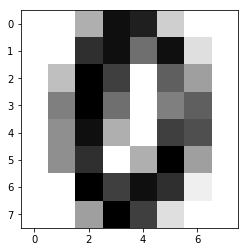

In [41]:
some_digit_image = some_digit.reshape(8, 8) # 因为原来是一维向量
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary) # 不要写成两个l
plt.show()

## 对原始数据集进行 train_test_split 需要无序数据集，无所谓反正train_test_split包含了索引乱序操作

In [42]:
from playML.model_selection import train_test_split # 导入函数

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_seed = 666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio = 0.2, seed = 666)

In [43]:
print(X_train.shape)

(1438, 64)


In [44]:
print(X_test.shape)

(359, 64)


In [45]:
print(y_train.shape)

(1438,)


In [46]:
print(y_test.shape)

(359,)


In [47]:
# 然后就是用我们自己的KNNClassifier类来测试了
from playML.kNN import KNNClassifier

my_knn_clf = KNNClassifier(k=3) # 实例化完成，创建自己的分类器
my_knn_clf.fit(X_train, y_train) # 拟合模型操作，有返回值就会打印出来

KNN(k=3)

In [48]:
# 判断模型的性能
# y_predict = np.empty(y_test.shape)
y_predict = my_knn_clf.predict(X_test) # 测试预测数据集，什么鬼？global name 'y_predict' is not defined

In [49]:
print(y_predict.shape)

(359,)


In [50]:
y_predict # 怎么变成小数了9.85519779e-316

array([9, 9, 7, 0, 3, 5, 2, 4, 6, 7, 7, 6, 9, 6, 2, 5, 2, 1, 6, 5, 1, 8, 6,
       2, 2, 3, 1, 7, 5, 4, 2, 6, 4, 6, 7, 4, 3, 7, 0, 0, 1, 3, 8, 2, 1, 8,
       3, 6, 6, 1, 6, 2, 9, 1, 1, 9, 2, 0, 3, 6, 5, 1, 9, 1, 3, 6, 4, 0, 6,
       3, 6, 0, 5, 1, 6, 7, 3, 7, 5, 6, 1, 3, 7, 1, 7, 4, 8, 2, 6, 7, 7, 8,
       9, 7, 4, 8, 7, 8, 9, 9, 7, 1, 6, 4, 3, 3, 5, 4, 2, 3, 0, 3, 7, 5, 6,
       3, 6, 7, 5, 1, 6, 7, 0, 0, 2, 3, 6, 4, 8, 7, 2, 9, 9, 9, 4, 2, 0, 5,
       0, 6, 8, 6, 6, 7, 4, 4, 5, 9, 3, 3, 8, 2, 5, 2, 4, 2, 3, 1, 8, 7, 2,
       7, 1, 6, 7, 2, 0, 4, 7, 2, 9, 0, 8, 0, 9, 8, 2, 1, 8, 3, 0, 2, 7, 6,
       4, 0, 8, 3, 2, 9, 9, 9, 7, 2, 6, 1, 8, 2, 1, 6, 9, 2, 0, 9, 3, 1, 7,
       4, 9, 2, 7, 8, 1, 8, 2, 2, 9, 0, 4, 7, 4, 6, 1, 7, 3, 1, 8, 6, 4, 9,
       9, 7, 8, 0, 4, 4, 6, 0, 6, 0, 0, 5, 3, 1, 6, 2, 2, 1, 8, 1, 0, 9, 6,
       3, 0, 3, 1, 2, 5, 9, 5, 7, 7, 2, 2, 7, 1, 3, 7, 5, 7, 5, 3, 0, 1, 1,
       1, 3, 8, 6, 9, 6, 8, 5, 5, 2, 3, 8, 3, 1, 5, 4, 1, 8, 5, 7, 4, 5, 8,
       2, 9,

In [51]:
sum(y_predict == y_test)

354

In [52]:
len(y_test)

359

In [53]:
from __future__ import division # 不知道为什么要加上这一句，可能是python2的原因吧
#
sum(y_predict == y_test) / len(y_test) # 预测准确度

0.98607242339832868

In [54]:
sum(y_predict == y_test) // len(y_test)

0

## 把这一组操作封装成一类函数模块

In [55]:
from playML.metrics import accuracy_score # 需要加 # coding: utf-8

In [56]:
accuracy_score(y_test, y_predict)

0.98607242339832868

## 只对准确率感兴趣

In [58]:
from playML.kNN import KNNClassifier

In [59]:
my_knn_clf.score(X_test, y_test) # 见鬼了，怎么又可见了，难道import要单独开个cell

0.98607242339832868

## 使用scikit-learn的内部函数accuracy_score，以便学习库的使用方法

In [61]:
from sklearn.model_selection import train_test_split
# 让后续的实验是可以重复的
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3)
# knn_clf.score(X_test, y_test) # 用测试集评价模型
# 大哥，模型你还没训练呢

In [65]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
knn_clf.score(X_test, y_test) # 测试集评价模型

0.98888888888888893

In [69]:
y_predict = knn_clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
# 熟悉调用方法
accuracy_score(y_test, y_predict)

0.98888888888888893

## n_neighbors传多少合适啊